# Game of Thrones - Graph Mining 

**Túlio Ribeiro**<br>

**Objective:** Define the main character from the script of the episodes

# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
 
import re

import networkx as nx

import glob

# 2. Load dataset

The dataset to be used is in .txt format and is composed of the script of the episodes of all seasons:

* 8 seasons with a total of 73 episodes

Two .txt files will also be used as a complementary data set, which contain the names of the cast and extra characters, including alias or misspelled words, grouped with their respective character.



## 2.1 Episodes scripts

In [2]:
# Returns files paths

path = 'dataset/GoT/*/*.txt'
files = glob.glob(path)

In [3]:
# Returns a dictionary with the episodes as key and the script as value

got = {}

for file in sorted(files):
    
    key = file[20:-4]
    
    with open(file, 'r', encoding='utf-8') as f:
        text = f.readlines()
        got[key] = text

In [4]:
got.keys()

dict_keys(['s01e01', 's01e02', 's01e03', 's01e04', 's01e05', 's01e06', 's01e07', 's01e08', 's01e09', 's01e10', 's02e01', 's02e02', 's02e03', 's02e04', 's02e05', 's02e06', 's02e07', 's02e08', 's02e09', 's02e10', 's03e01', 's03e02', 's03e03', 's03e04', 's03e05', 's03e06', 's03e07', 's03e08', 's03e09', 's03e10', 's04e01', 's04e02', 's04e03', 's04e04', 's04e05', 's04e06', 's04e07', 's04e08', 's04e09', 's04e10', 's05e01', 's05e02', 's05e03', 's05e04', 's05e05', 's05e06', 's05e07', 's05e08', 's05e09', 's05e10', 's06e01', 's06e02', 's06e03', 's06e04', 's06e05', 's06e06', 's06e07', 's06e08', 's06e09', 's06e10', 's07e01', 's07e02', 's07e03', 's07e04', 's07e05', 's07e06', 's07e07', 's08e01', 's08e02', 's08e03', 's08e04', 's08e05', 's08e06'])

In [5]:
list(got.values())[0][:5]

['EPISODE 1 - WINTER IS COMING\n',
 '\n',
 '[First scene opens with three Rangers riding through a tunnel, leaving the Wall, and going into the woods. (Eerie music in background) One Ranger splits off and finds a campsite full of mutilated bodies, including a child hanging from a tree branch. A birds-eye view shows the bodies arranged in a shield-like pattern. The Ranger rides back to the other two.]\n',
 '\n',
 'WAYMAR ROYCE: What d’you expect? They’re savages. One lot steals a goat from another lot and before you know it, they’re ripping each other to pieces.\n']

In [6]:
len(got.keys())

73

## 2.2 Cast and extra characters

In [7]:
# read a list of extra characters

with open('dataset/extra_characters.txt', 'r', encoding='utf-8') as f:
        extra_characters = f.readlines()

print(extra_characters[:1])

['"A VOICE", "ALL", "ALL THREE", "ALL TOGETHER", "WOMAN 1", "VOICE", "VOICES OUTSIDE", "WAITRESS", "UNSULLIED CAPTAIN", "INNKEEPER", "LHAZAREEN WOMAN", "TRIBESMEN OF THE VALE", "LITTLE SAM", "IRONBORN", "IRONBORN LORD", "LISTENERS", "LANNISTER SCOUT", "LANNISTER SOLDIER", "TORTURER", "LEADER", "LEAF", "INNKEEPER\'S DAUGHER", "HOT PIE", "GUARD 3", "HOODED FIGURE", "FELLOW NIGHT\'S WATCH BROTHERS", "FATHER", "ELDER MEEREEN SLAVE", "DRIVER", "BANKER", "TOGETHER", "DORNISH LORD", "DORNISH PRINCE", "DAUGHTER", "CHILD", "CHILD OF THE FOREST", "ATTENDANT", "BALON DWARF", "ANNOUNCER", "ARCHERS", "ASSASSIN", "BABY", "BLACK HAIRED PROSTITUTE", "SURVIVOR", "BLACKSMITH", "BLONDE PROSTITUTE", "BLOODRIDER", "BLOODRIDER #1", "BLOODRIDER #2", "BLOODRIDER #3", "BLOODRIDER #4", "BOLTON BANNERMAN", "STRONG", "BOLTON GUARD", "BOLTON OFFICER", "BOTH", "BOTH JON AND SAM", "SAM, PYP, AND GRENN", "BOY", "BROTHER", "BROTHERS", "CAPTAIN", "CHAMPION", "STREET URCHIN", "CROWD", "CUARD #2", "DOTHRAKI #1", "DOTHRAK

In [8]:
# read a nested list with characters aliases

with open('dataset/cast_characters.txt', 'r', encoding='utf-8') as f:
        cast_characters = f.readlines()

print(cast_characters[:7])      

['ALLISER\n', 'ALLISER THORN\n', 'ALLISER THORNE\n', 'ALLISER THRONE\n', 'ALLISTER\n', '\n', 'AMORY LORCH\n']


# 3. Data Engineering

The dataset cleaning was performed using the following strategies:

* Join the text of all episodes into one list and exclude the \n

* Transform the extra character's data from a list with one string (with all the words) to a list of elements (or strings), in which each element will be a word. As well as removing the " and \n

* Transform the cast character's data into a nested list, in which each list will be composed of the character's aliases and misspellings. As well as removing the \n

## 3.1 Episodes scripts

Join the text of all episodes into one list and exclude the \n

In [9]:
# Join all the episodes and exclude the \n

full_text = []

for name, text in got.items():
    
    for line in text:
        
        if line != '\n':
            
            full_text.append(line)

## 3.2 Extra characters

Transform the extra characters' data from a list with one string (with all the words) to a list of elements (or strings), in which each element will be a word. As well as removing the " and \n

In [10]:
# Clean extra characters list
      
extra_characters = extra_characters[0].split(', ') # transform one big list in an element's list

# remove " and \n
for i in range(len(extra_characters)):
    
    extra_characters[i] = extra_characters[i].replace('"', '').replace('\n', '')

extra_node = [word.lower() for word in extra_characters]

In [11]:
extra_node[:5]

['a voice', 'all', 'all three', 'all together', 'woman 1']

## 3.3 Cast characters

Transform the cast character' data into a nested list, in which each list will be composed of the character' aliases and misspellings. As well as removing the \n

In [12]:
# Clean cast characters list
# remove \n

for i in range(len(cast_characters)):
    
    cast_characters[i] = cast_characters[i].replace('\n', '')

In [13]:
cast_characters[:7]

['ALLISER',
 'ALLISER THORN',
 'ALLISER THORNE',
 'ALLISER THRONE',
 'ALLISTER',
 '',
 'AMORY LORCH']

In [14]:
# create a list with grouped characters in separeted lists

cast_alias = []

tmp = []

for element in cast_characters:

    if (element != ''):
        tmp.append(element)

    else:
        cast_alias.append(tmp)
        tmp = []

cast_alias.append(tmp)

In [15]:
cast_alias[:2][:]

[['ALLISER', 'ALLISER THORN', 'ALLISER THORNE', 'ALLISER THRONE', 'ALLISTER'],
 ['AMORY LORCH', 'ARMORY', 'AMORY']]

# 4. Nodes and Edges selection

## 4.1 Nodes

The strategy to define the nodes consisted in checking the names present before the script referring to the character's speech. 

The example below demonstrates the speech of a character, which is preceded by its respective name. 

    'WAYMAR ROYCE: What d’you expect? They’re savages. One lot steals a goat from another lot and before you know it, they’re ripping each other to pieces.\n']

The goal is to extract only the name ```WAYMAR ROYCE```

**Loop**

* Searches for the pattern in the text
* Adds the node to the list when it finds the pattern and if it's not a extra character
* Look for the node in the cast character list:
  * If node exists in the cast character list, it considers only one name from the aliases
  * If not, the node is added to the nodes list

In [16]:
# searches for the name present before the : and that is up to 20 characters long so as not to bring up phrases

pattern = r'^.{1,20}(?=\:)' 

nodes = []

for line in full_text:
    
    node = re.match(pattern, line)
    
    if node:
        
        node = node.group(0) 
        
        if any(word in node.lower() for word in extra_node): # excludes the extra characters
            
            pass
        
        else:
            
            count = 0
            
            for i in range(len(cast_alias)): # delete the aliases and add the characters that are not in the list 
                
                if node.upper() in cast_alias[i]:
                    node = cast_alias[i][0].lower()          
                    nodes.append(node)
                    count += 1
                    
            if count == 0:
                nodes.append(node.lower().split('(')[0].strip())

* Frequency of each node in the text in descending order

In [17]:
sorted(Counter(nodes).items(), key = lambda item: (-item[1], item[0]))[:10]

[('tyriom', 1850),
 ('john', 1250),
 ('daenarys stormborn', 1085),
 ('cersei', 1035),
 ('jaime', 978),
 ('cut to', 905),
 ('little bird', 842),
 ('arya stark', 803),
 ('dav os', 521),
 ('theon', 491)]

* Through an initial analysis, it can be observed that Tyriom is the most mentioned name in the scripts, followed by John and Daenarys. Possibly, these are the main characters of the story

* Define the unique nodes and quantify them

In [18]:
unique_nodes = np.unique(np.array(nodes))
unique_nodes[:20]

array(['"steelshanks" walton', '[jojen', 'addam marbrand', 'aemon',
       'aeron', 'aerson', 'ahsa', 'alton', 'amory lorch', 'anguy', 'areo',
       'arthur', 'arya', 'arya stark', 'axell florent', 'balon greyjoy',
       'barristan', 'barristan selmy', 'belicho paenymion', 'benjen'],
      dtype='<U20')

In [19]:
len(unique_nodes)

322

## 4.2 Context Identification

Before defining the connections (or edges) between nodes it is necessary to identify the context of each line of text, and for this a function was created.

The function looks for the same pattern used to identify the nodes, that is, if the line has a text and : at the beginning, limited to 20 characters so as not to bring up phrases, as shown below:

    'WAYMAR ROYCE: What d’you expect? They’re savages. One lot steals a goat from another lot and before you know it, they’re ripping each other to pieces.\n']

When the pattern is found, the line is defined as a dialog and some conditions are tested that concern the description of the scene and not a character's speech.

    CUT TO: GREAT WEIRWOOD TREE - BACK ENTRANCE

    Tell me something: Do you still believe good soldiers make good kings?

    EXT: THE STREETS OF KING'S LANDING

    INT: THE RED KEEP CELLAR

If any of these conditions are true, the line is not considered a dialog.

In short, this function aims to filter the text with only those lines that are character lines.

In [20]:
def IsDialog(text):
    pattern = r'^.{1,20}(?=\:)'
    dialog = re.match(pattern, text)

    if dialog:
        patt_cut = r'^cut to(?=\:)'
        cut_to = re.match(patt_cut, text, flags = re.I)

        patt_something = r'^tell me something(?=\:)'
        tell_me_something = re.match(patt_something, text, flags = re.I)
          
        patt_ext = r'^ext(?=\:)'
        exterior = re.match(patt_ext, text, flags = re.I)
          
        patt_int = r'^int(?=\:)'
        interior = re.match(patt_int, text, flags = re.I)

        if cut_to or tell_me_something or exterior or interior:
            return False
        
        else:
            return True
    else:
        return False

## 4.3 Edges

To define the links between nodes a loop was created that returns a dictionary:
  * key: tuple with the names of 2 characters (link or edge)
  * value: absolute frequency of the tuple

The loop logic for defining what is a connection between two characters consists of:

* The ```IsDialog``` function is applied to the text to identify lines that are character speech;

* The link is created between the line being iterated (character's speech in line X) with previous line (character's speech in line X-1)

* In this way, a tuple is created with the names of the two characters and their frequency is counted

For example: in the text below, the loop would create two tuples:

**Text:**        

        JOFFREY: Rhaenyra Targaryen was murdered by her brother, or rather his dragon. It ate her while her son watched. What's left of her is buried in the crypts right down there.

        CERSEI: The ceremony is traditionally held in the main sanctum, which seats seven hundred comfortably.

        OLENNA: There appears to be a good deal of room elsewhere on the premises for everyone else.

**Result:**

        (JOFFREY, CERSEI) (CERSEI, OLENNA)

In short, the dictionary resulting from the loop will have the edges as keys (links) and the respective weight of the edge as value (absolute frequency)

In [21]:
links = {}

for i in range(1, len(full_text)):

    if IsDialog(full_text[i-1]) and IsDialog(full_text[i]): # aplica a função na linha que está sendo iterada e na linha anterior

        link = (full_text[i-1].lower().split(':')[0].split('(')[0].strip(), full_text[i].lower().split(':')[0].split('(')[0].strip()) # retorna uma tupla com o nome do personagem da linha que está sendo iterada e da linha anterior
    
        if link[0] in unique_nodes[:300] and link[1] in unique_nodes[:300]: # verifica se os nomes estão na lista de nós

            if link[0] != link[1]:  # verifica se a tupla não está com dois nomes iguais

                if link in links: # contabiliza a frequência das tuplas
                    links[link] += 1

                else: # se a tupla não existir, inicia a frequencia da tupla
                    links[link] = 1

In [22]:
list(links.items())[0]

(('gared', 'royce'), 2)

# 5. Network Creation

In this section the network is created using the NetworkX library, which is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

The network was created from the edge dictionary, in which the key represents the edge between two nodes (tuple) and the value represents the weight of the edge (absolute frequency)

In [23]:
G = nx.Graph()

for k, v in links.items():
    G.add_edge(k[0], k[1], weight=v)

In [24]:
color_map = []

possible_main_characters = ['jon', 'tyrion', 'daenerys', 'jaime', 'cersei', 'sansa']

for node in G:

    if node in possible_main_characters:
        color_map.append('green')
        
    else:
        color_map.append('lightblue')

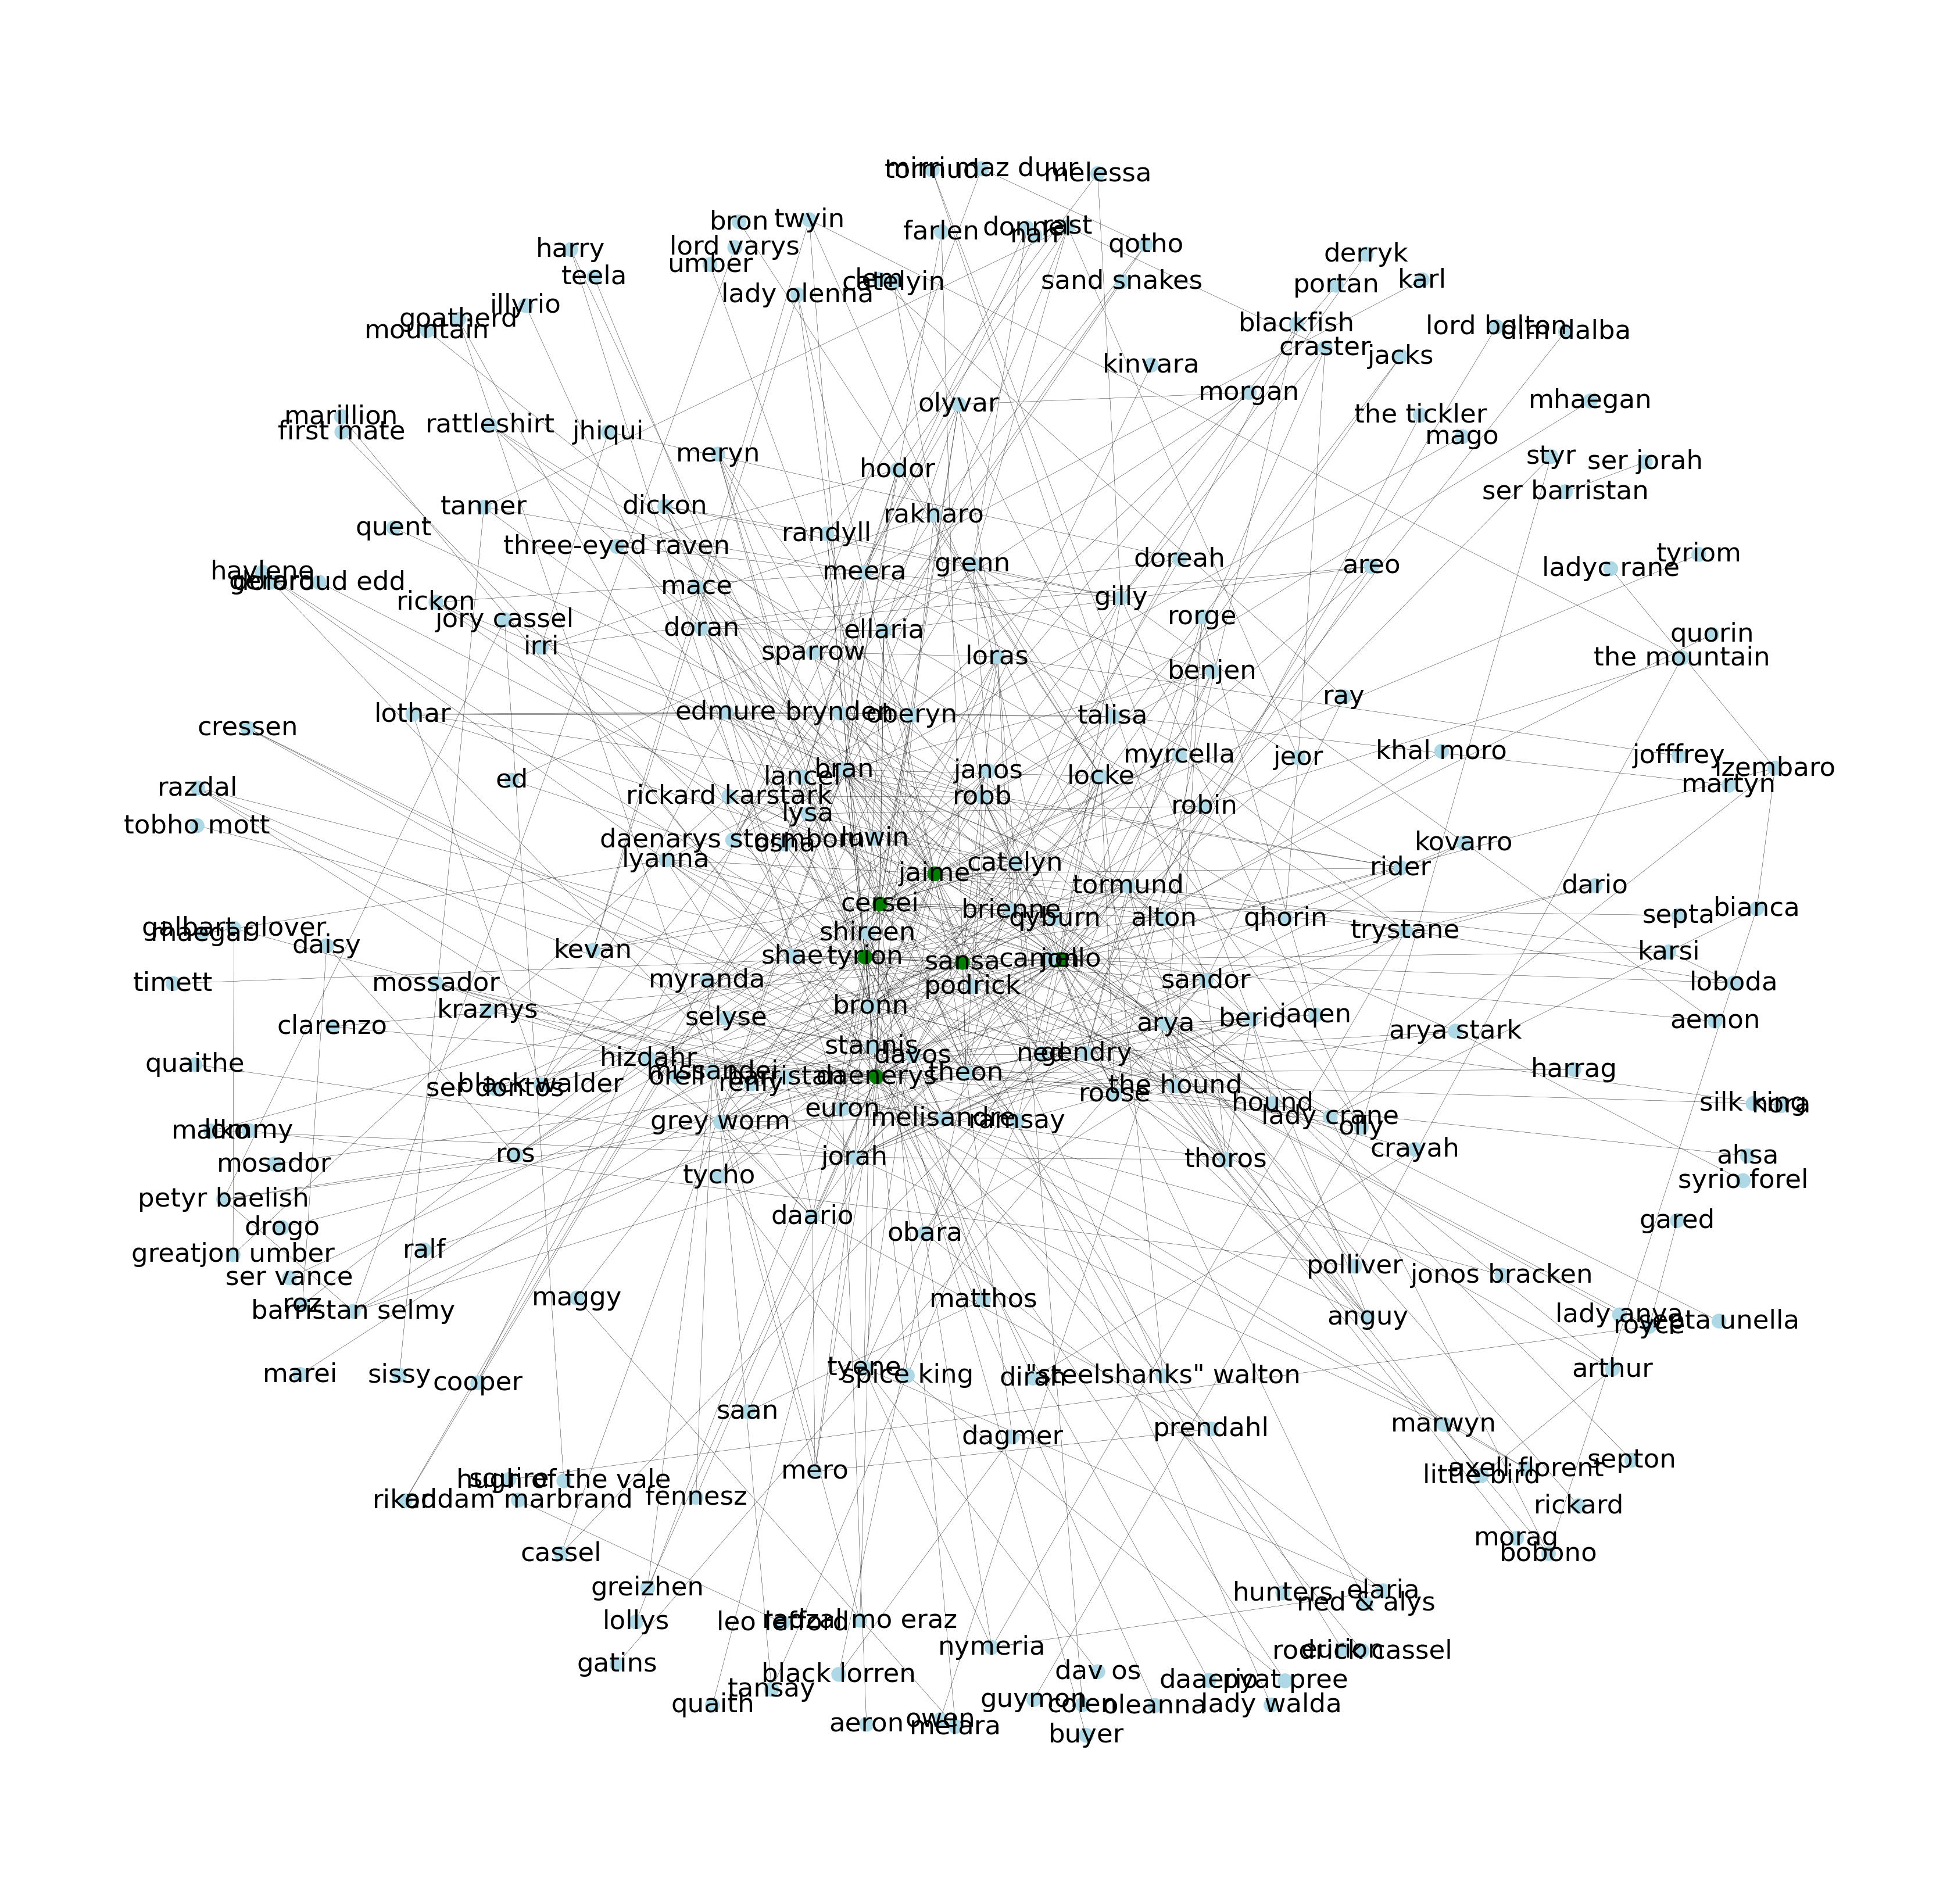

In [25]:
fig, ax = plt.subplots(figsize=(60, 60))

pos = nx.spring_layout(G, k=0.8)

nx.draw(G, pos, ax=ax, with_labels = True, node_color=color_map, node_size=600, font_size=45, width=0.4)

plt.savefig('graphs/network.png')

# 6. Centrality Measures

The centrality measures aim to investigate which would be the most important nodes (or characters) in a network. The main hypothesis is that the more relations and articulation of relations a node has, the greater its degree of importance and relevance to the structural pattern of the network. 

However, the number of relationships will not always be the main measure for network analysis. In other cases, for example, the main question is not the number of relations, but the position in which the node is located, or the relations of greatest relevance or weight for a given context.

Thus, some measures of centrality are calculated in this section, namely:

* Degree Centrality

* Eigenvector Centrality

* PageRank

* Closeness Centrality

## 6.1 Degree Centrality

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). If the network is directed (meaning that ties have direction), then two separate measures of degree centrality are defined, namely, indegree and outdegree. Indegree is a count of the number of ties directed to the node (head endpoints) and outdegree is the number of ties that the node directs to others (tail endpoints). In such cases, the degree is the sum of indegree and outdegree.

In [26]:
list_of_degrees = list(dict(G.degree).values())
counter = Counter(list_of_degrees)
print(counter)

Counter({1: 76, 2: 49, 4: 22, 3: 21, 5: 14, 6: 12, 7: 8, 11: 7, 8: 6, 10: 4, 9: 4, 21: 2, 26: 2, 25: 2, 41: 2, 16: 2, 19: 2, 13: 2, 42: 1, 18: 1, 40: 1, 33: 1, 30: 1, 22: 1, 17: 1})


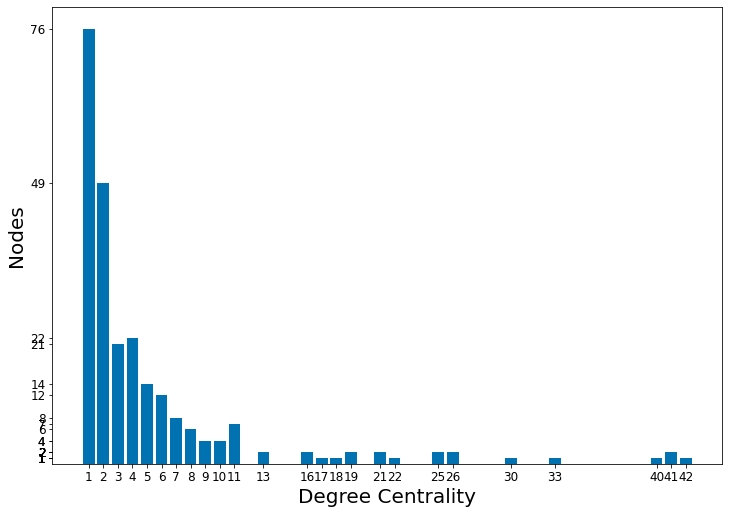

In [27]:
x = list(counter.keys())
y = list(counter.values())

def plot_bar(x, y):
    figx = 12
    figy = (7/10) * figx
    fig, ax = plt.subplots(figsize=(figx, figy))
    myplot = ax.bar(x,
                    y,
                    color = '#0072B2',
                    align = 'center')

    ax.set_xlabel('Degree Centrality', fontsize='20')
    ax.set_ylabel('Nodes', fontsize='20')
    
    ax.set_xticks(x)
    ax.set_yticks(y)
    
    ax.set_xticklabels(x, fontsize='12')
    ax.set_yticklabels(y, fontsize='12')

plot_bar(x, y)

In [28]:
sorted(list(G.degree()), key = lambda tup: tup[1], reverse = True)[:20]

[('jon', 42),
 ('tyrion', 41),
 ('daenerys', 41),
 ('jaime', 40),
 ('cersei', 33),
 ('sansa', 30),
 ('bran', 26),
 ('bronn', 26),
 ('theon', 25),
 ('davos', 25),
 ('jorah', 22),
 ('catelyn', 21),
 ('arya', 21),
 ('brienne', 19),
 ('tormund', 19),
 ('robb', 18),
 ('melisandre', 17),
 ('gendry', 16),
 ('missandei', 16),
 ('beric', 13)]

* Analyzing the degree of centrality, it is possible to observe that 4 nodes stand out from the others and present the largest number of connections, namely:

  ```('jon', 42)```

  ```('tyrion', 41)```

  ```('daenerys', 41)```

  ```('jaime', 40)```

* Degree centrality is defined as the amount of connections a node has, and consequently, its interpretation is based on its relative importance to mobilize or trigger other nodes.

* According to the degree centrality, we can define a group of 4 main characters that stand out from the others by the amount of connections. These characters are the ones who have more interaction with other characters during the plot.



## 6.2 Eigenvector Centrality

Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. Relationships originating from high-scoring nodes contribute more to the score of a node than connections from low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.


In [29]:
eigenvector_centrality = nx.eigenvector_centrality(G)

print(list(eigenvector_centrality.items())[:5])

[('gared', 0.0011427152122199093), ('royce', 0.01670236150322932), ('ned', 0.09843434916950132), ('jon', 0.29070530910143655), ('robb', 0.1024586954341945)]


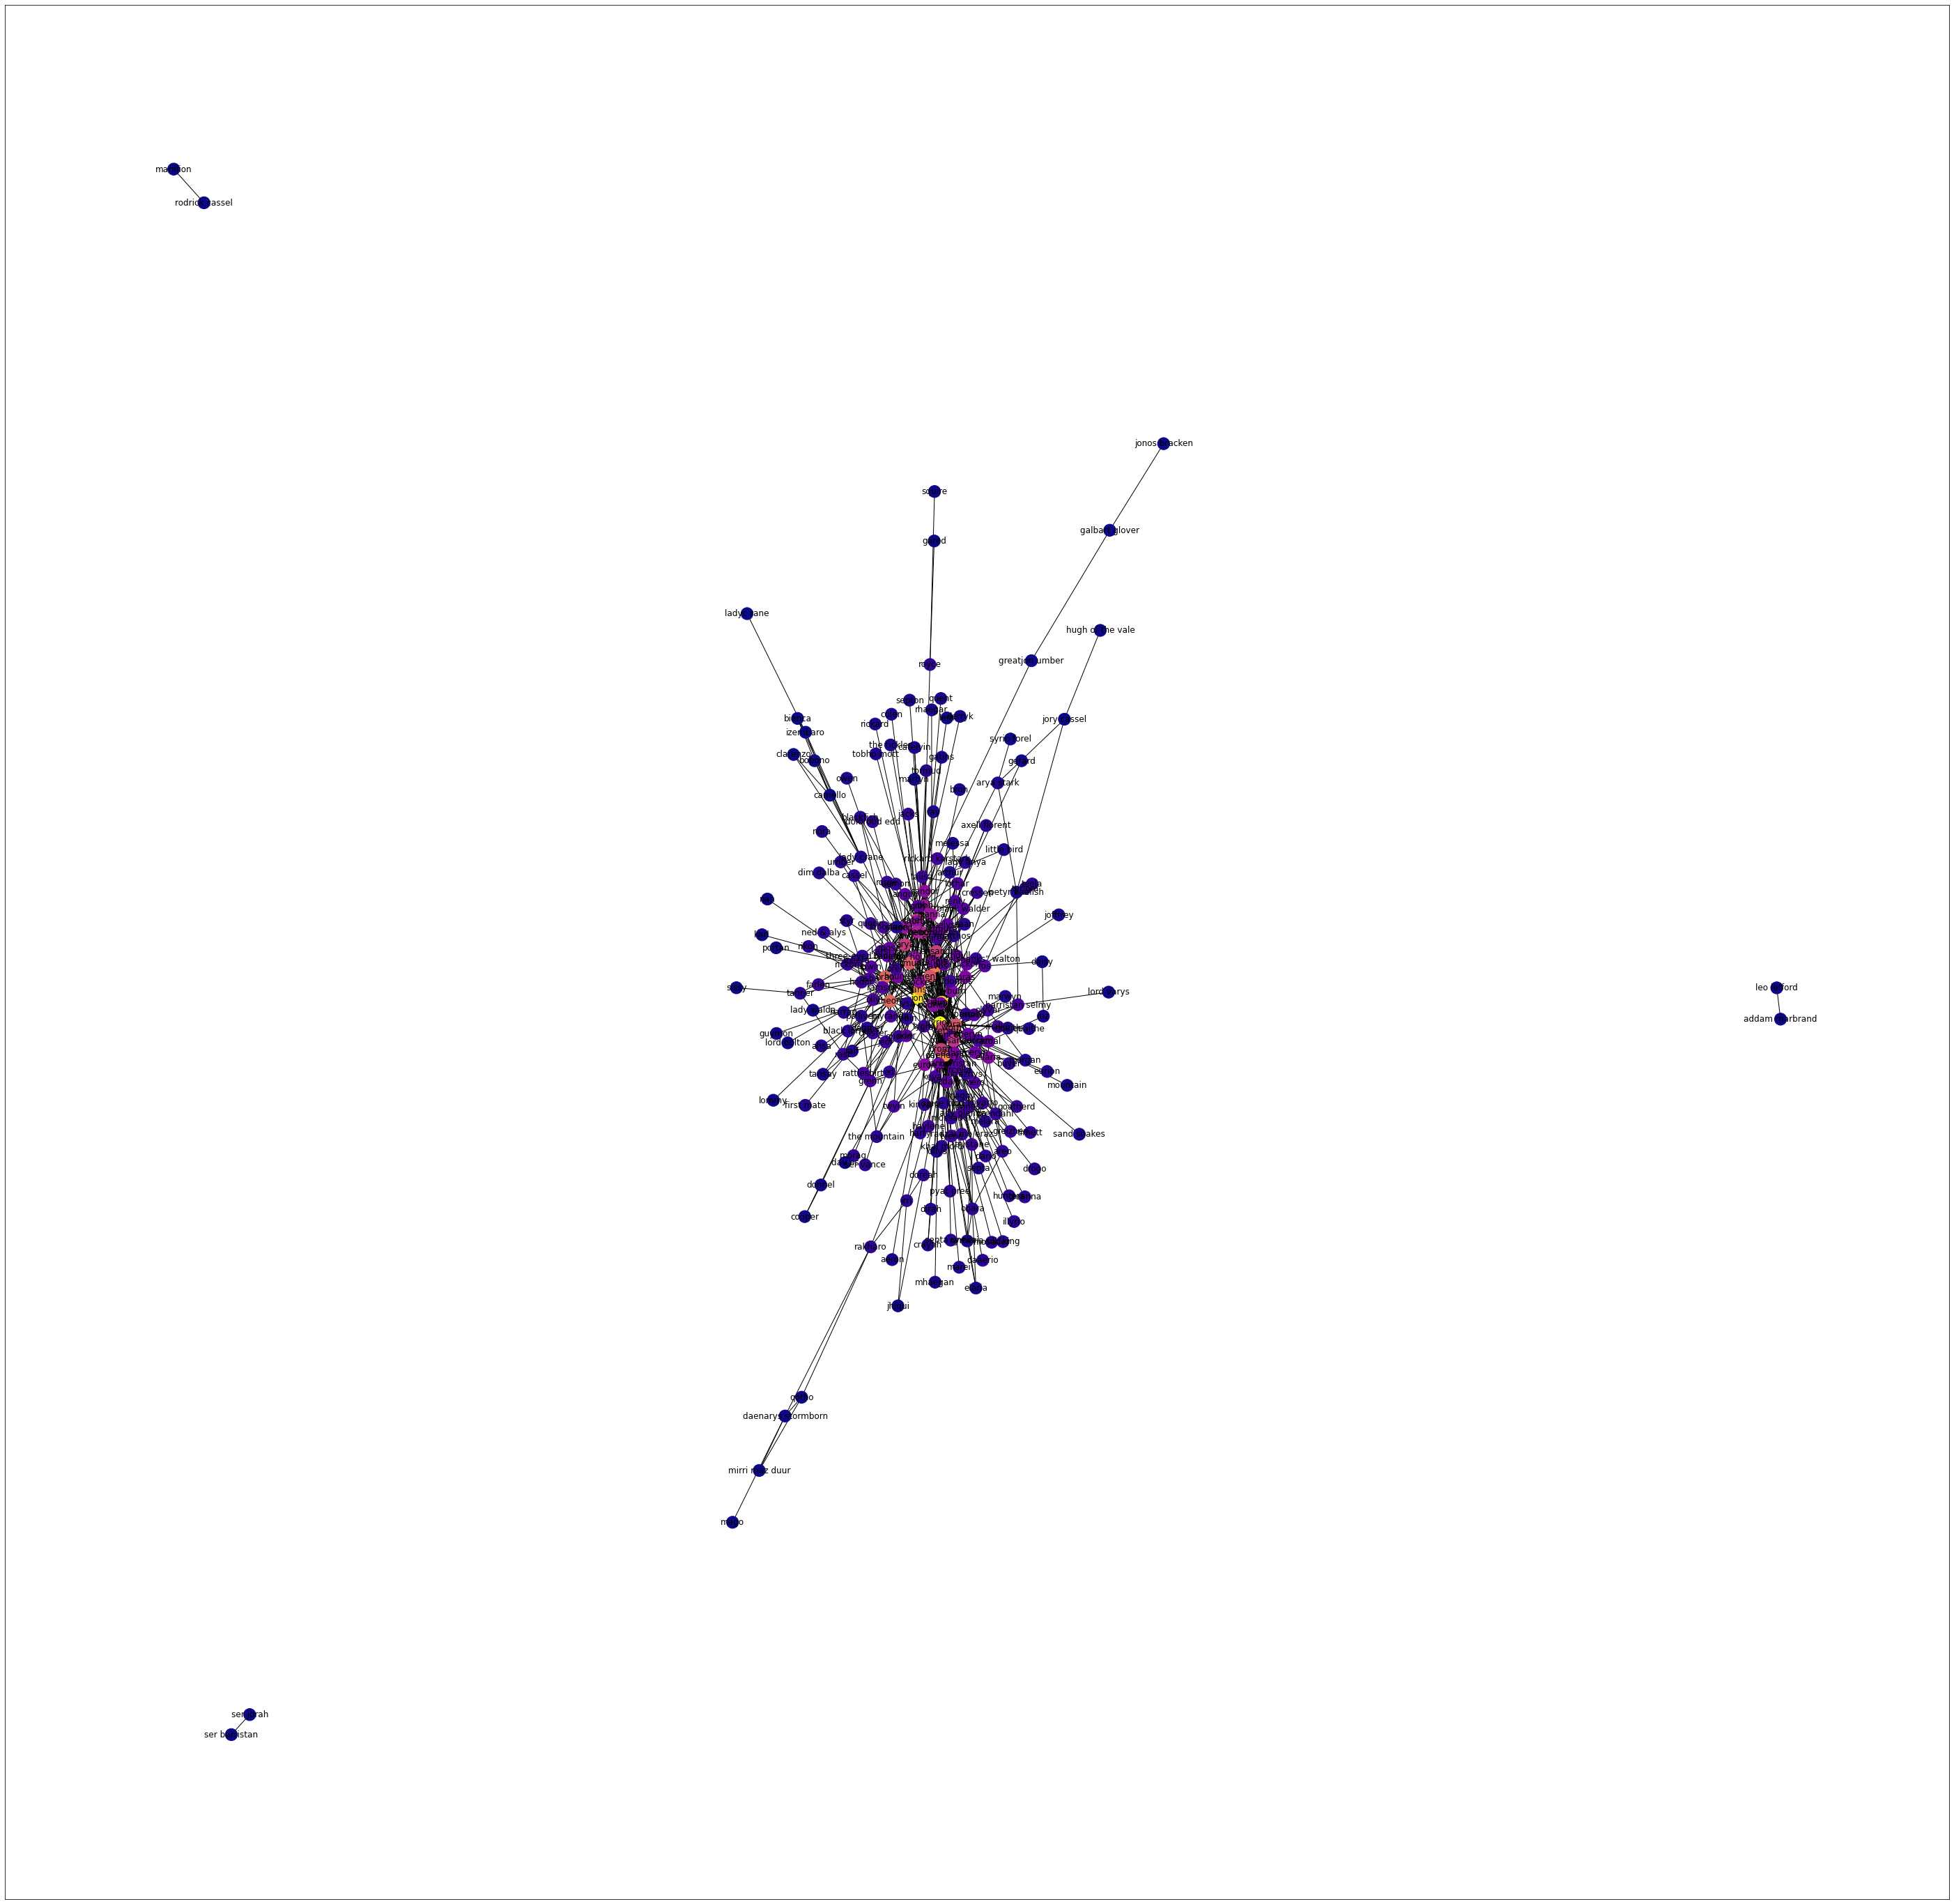

In [30]:
def plot_network(G, x):
    fig,ax = plt.subplots(figsize=(50, 50))
    pos = nx.spring_layout(G,
                           seed=42)
    
    nx.draw_networkx(G,
                     pos,
                     cmap = plt.cm.plasma,
                     node_color = list(x.values()),
                     nodelist = x.keys())

plot_network(G, eigenvector_centrality)

plt.savefig('graphs/eigenvector.png')

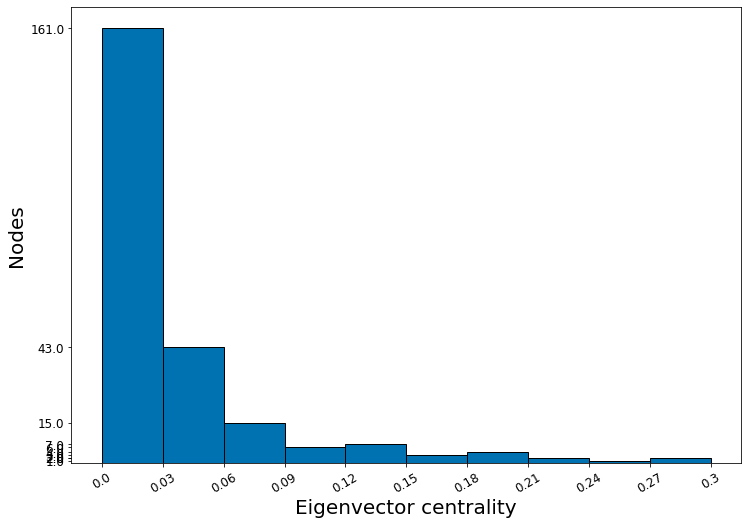

In [31]:
def plot_hist(x, xlabel):
    figx = 12
    figy = (7/10) * figx
    fig, ax = plt.subplots(figsize=(figx, figy))
    n, bins, patches = ax.hist(x,
                               color='#0072B2',
                               edgecolor='#000000')
    
    ax.set_xlabel(xlabel, fontsize='20')
    ax.set_ylabel('Nodes', fontsize='20')

    ax.set_xticks(bins)
    ax.set_yticks(n)
    xticklabels = [round(b, 2) for b in bins]
    
    ax.set_xticklabels(xticklabels, fontsize='12', rotation=30)
    ax.set_yticklabels(n, fontsize='12')

plot_hist(eigenvector_centrality.values(), 'Eigenvector centrality')

In [32]:
sorted(((v, f"{c:0.2f}") for v, c in eigenvector_centrality.items()), key = lambda tup: tup[1], reverse = True)[:20]

[('tyrion', '0.30'),
 ('jon', '0.29'),
 ('jaime', '0.27'),
 ('sansa', '0.24'),
 ('daenerys', '0.22'),
 ('davos', '0.21'),
 ('cersei', '0.19'),
 ('bran', '0.18'),
 ('theon', '0.18'),
 ('jorah', '0.17'),
 ('brienne', '0.17'),
 ('tormund', '0.17'),
 ('melisandre', '0.15'),
 ('grey worm', '0.15'),
 ('catelyn', '0.14'),
 ('arya', '0.14'),
 ('bronn', '0.14'),
 ('gendry', '0.13'),
 ('missandei', '0.13'),
 ('beric', '0.11')]

* The purpose of eigenvector centrality is to measure the importance of a vertex as a function of the importance of its neighbors. This means that even if a vertex is connected to only a few other vertices in the network (thus having a low degree centrality), these neighbors can be important and, consequently, the vertex will also be important, obtaining a high eigenvector centrality.

* Analyzing the ranked eigenvector score of the nodes and considering the top 4 results, we have:

```('tyrion', '0.30')```

```('jon', '0.29')```

```('jaime', '0.27')```

```('sansa', '0.24')```

* Comparing the result above with the result of degree centrality, we can observe that the node "sansa" appeared in place of "daenerys". Thus, it can be concluded that although the node "sansa" has less connections (or edges) than the node "daenerys", it has more relevant connections, that is, with higher scores.

## 6.3 PageRank

PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results and is a variant of the eigenvector centrality measure. It was introduced by Larry Page and was first used to rank web pages in the Google search engine. Nowadays, it is more and more used in many different fields, for example in ranking users in social media, graphs, complex networks, etc.

According to Google:

```PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites```

In [33]:
# AttributeError: module 'scipy.sparse' has no attribute 'coo_array'
# %pip install --upgrade scipy networkx 

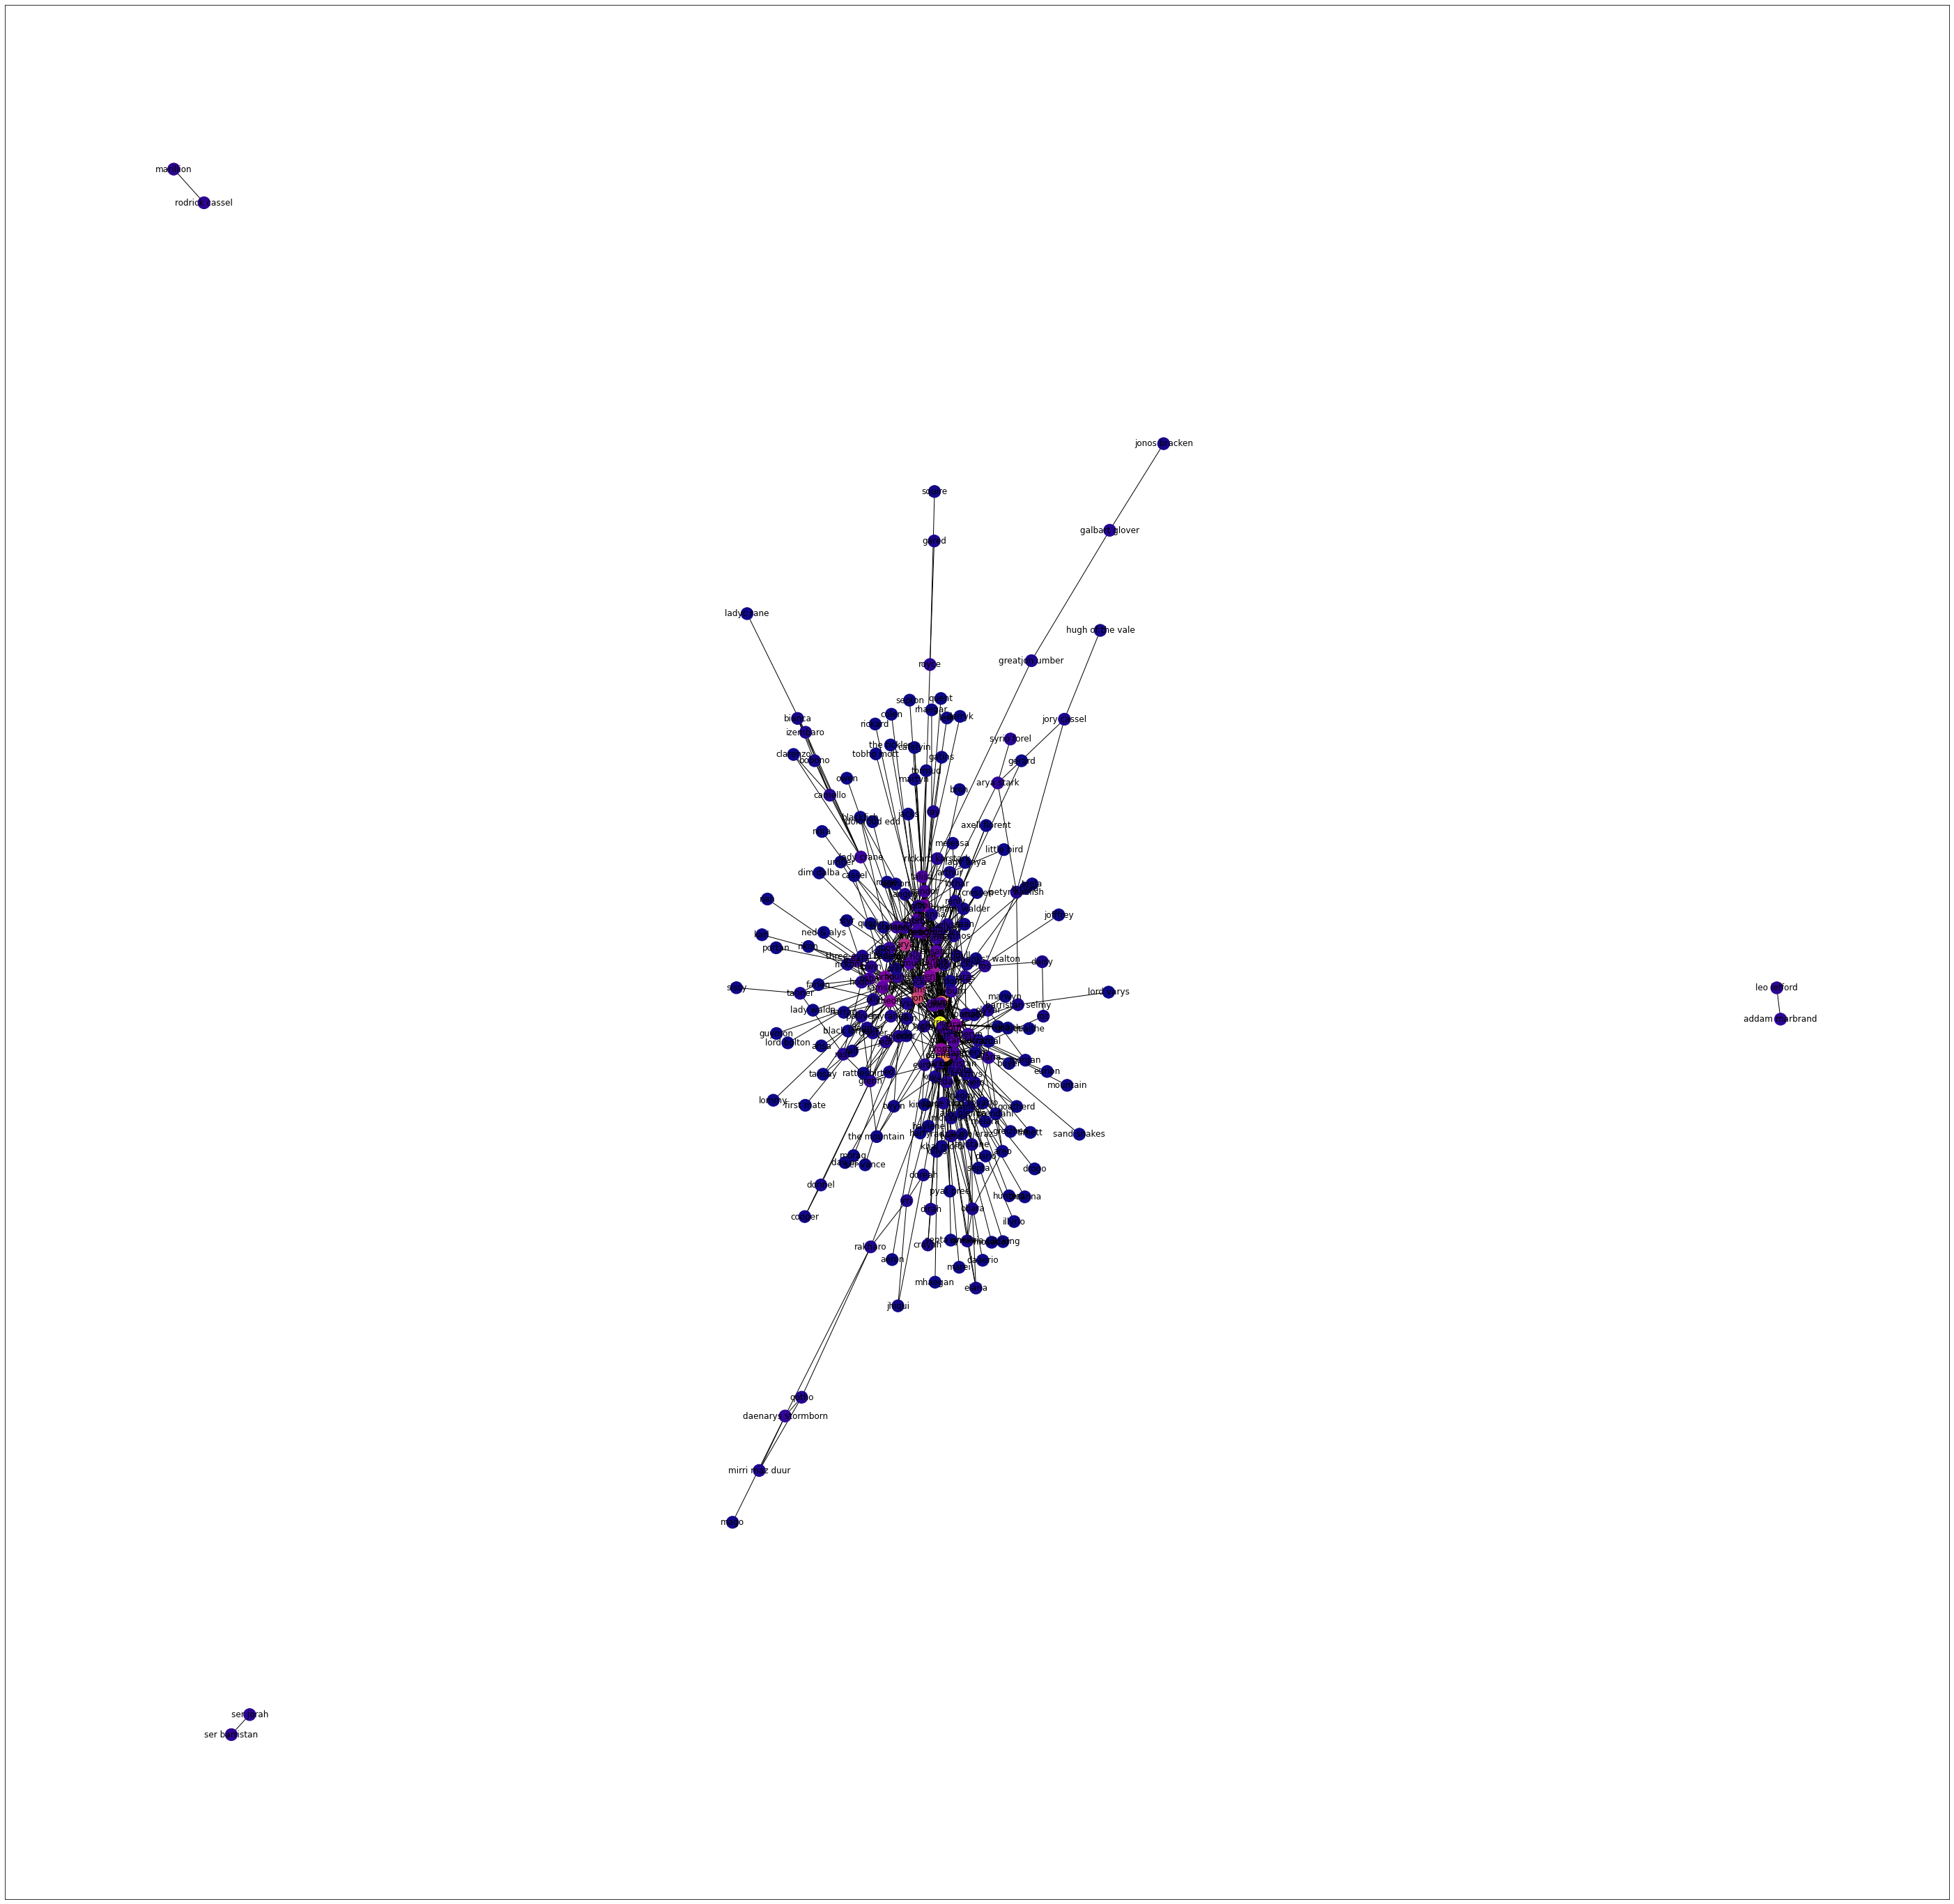

In [34]:
pagerank = nx.pagerank(G)

plot_network(G, pagerank)

plt.savefig('graphs/pagerank.png')

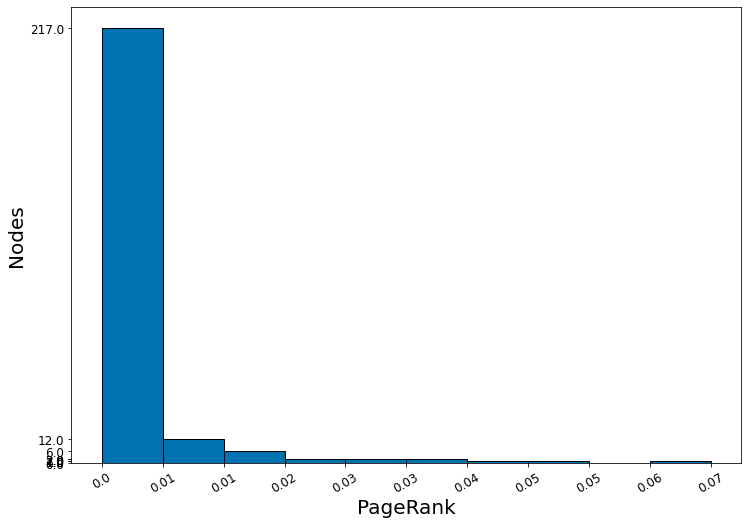

In [35]:
plot_hist(pagerank.values(), 'PageRank')

In [36]:
sorted(((v, f"{c:0.2f}") for v, c in pagerank.items()), key = lambda tup: tup[1], reverse = True)[:20]

[('tyrion', '0.07'),
 ('jaime', '0.05'),
 ('daenerys', '0.05'),
 ('jon', '0.04'),
 ('cersei', '0.04'),
 ('arya', '0.03'),
 ('sansa', '0.03'),
 ('robb', '0.02'),
 ('bran', '0.02'),
 ('theon', '0.02'),
 ('jorah', '0.02'),
 ('bronn', '0.02'),
 ('davos', '0.02'),
 ('stannis', '0.02'),
 ('brienne', '0.02'),
 ('catelyn', '0.01'),
 ('the hound', '0.01'),
 ('gendry', '0.01'),
 ('shae', '0.01'),
 ('osha', '0.01')]

* PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. 

* The ranking of the nodes calculated by PageRank showed the same top four results as the degree centrality, but in a different order. 

```('tyrion', '0.07')```

```('jaime', '0.05')```

```('daenerys', '0.05')```

``` ('jon', '0.04')```

## 6.4 Closeness Centrality

Closeness centrality indicates how close a node is to all other nodes in the network. It is calculated as the average shortest distance from each vertex to each other vertex. Specifically, it is the inverse of the average shortest distance between the vertex and all other vertices in the network.

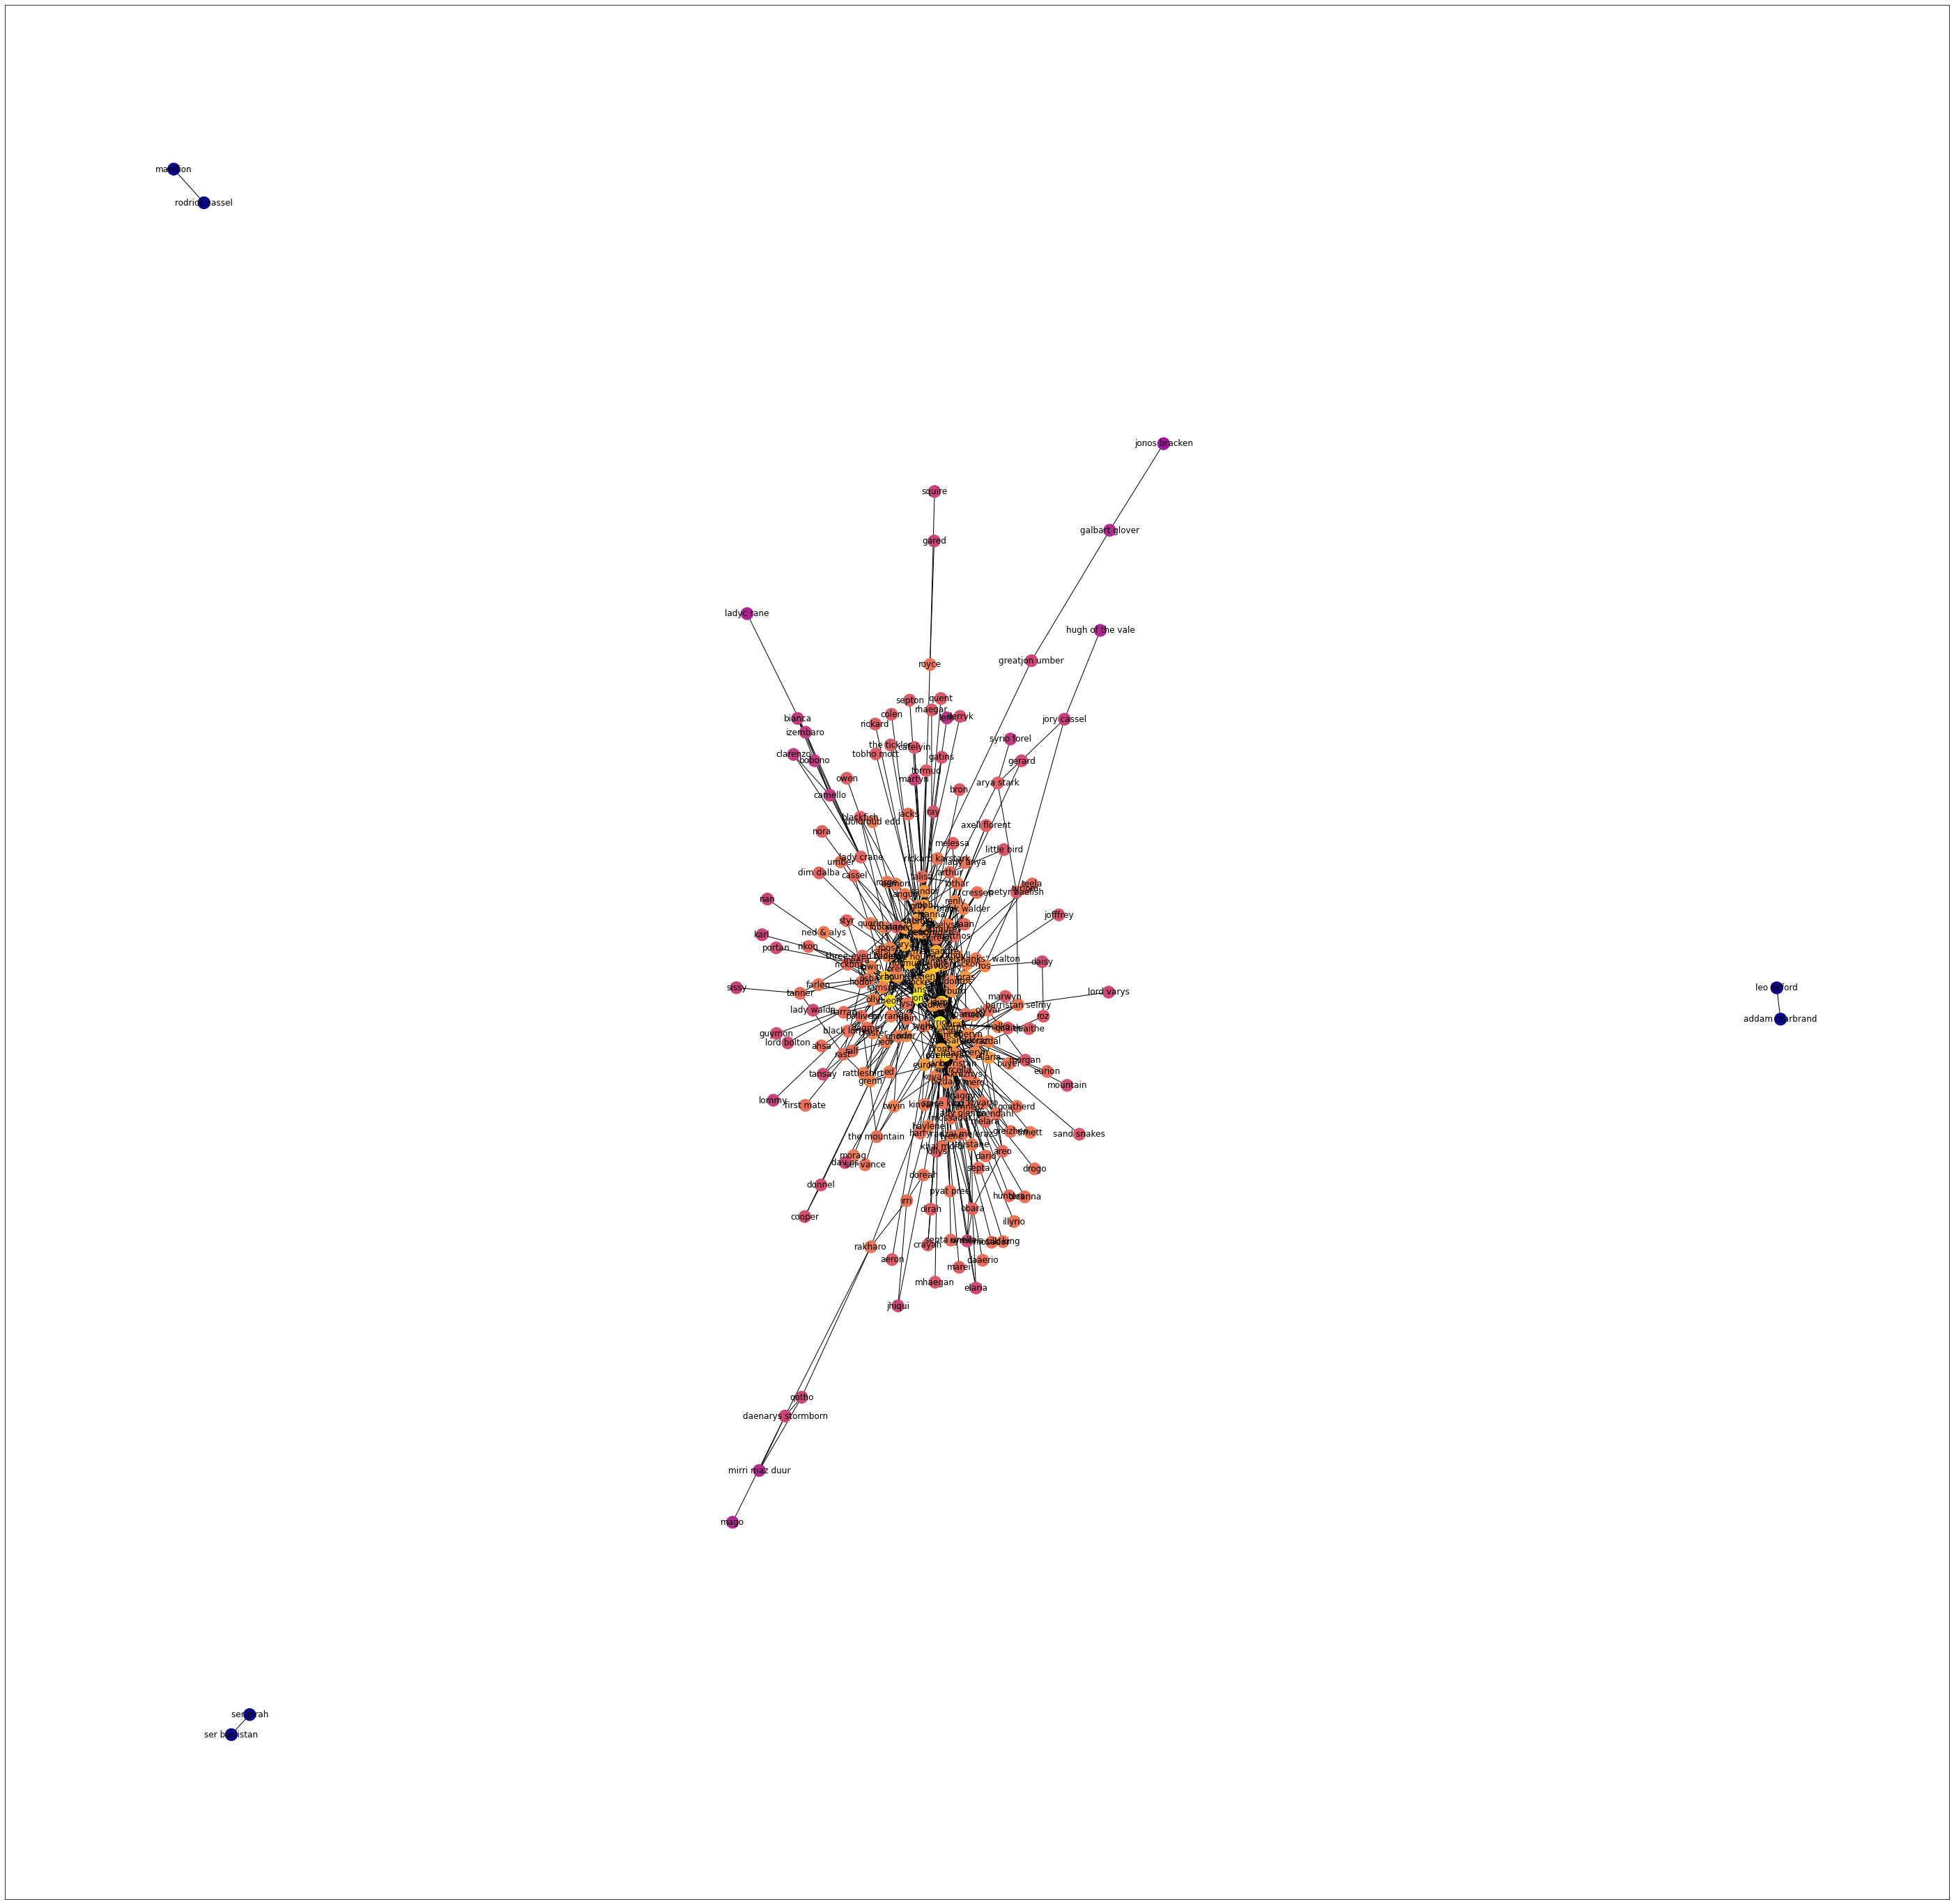

In [37]:
closeness_centrality = nx.closeness_centrality(G)

plot_network(G, closeness_centrality)

plt.savefig('graphs/closeness.png')

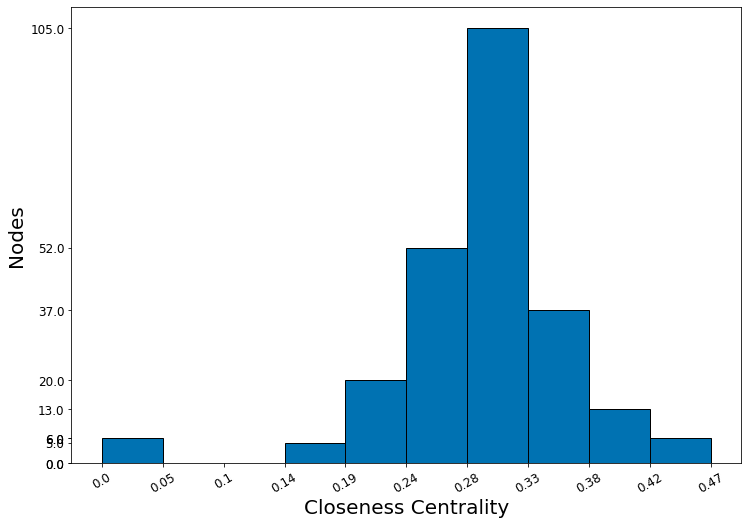

In [38]:
plot_hist(closeness_centrality.values(), 'Closeness Centrality')

In [39]:
sorted(((v, f"{c:0.2f}") for v, c in closeness_centrality.items()), key = lambda tup: tup[1], reverse = True)[:20]

[('jon', '0.47'),
 ('tyrion', '0.46'),
 ('jaime', '0.45'),
 ('sansa', '0.45'),
 ('daenerys', '0.44'),
 ('theon', '0.43'),
 ('cersei', '0.42'),
 ('davos', '0.42'),
 ('bran', '0.41'),
 ('brienne', '0.40'),
 ('tormund', '0.40'),
 ('arya', '0.39'),
 ('melisandre', '0.39'),
 ('grey worm', '0.39'),
 ('ned', '0.38'),
 ('catelyn', '0.38'),
 ('jorah', '0.38'),
 ('gendry', '0.38'),
 ('bronn', '0.38'),
 ('missandei', '0.38')]

* Proximity centrality measures how central a node is, i.e. the more central a node is, the closer it is to all other nodes.

* The most central nodes in the network are:

```('jon', '0.47')```

```('tyrion', '0.46')```

```('jaime', '0.45')```

```('sansa', '0.45')```

# 7. Conclusion

* The objective of this project was to define which is the most important character in the plot from the episode scripts using network analysis. In this way, the centrality measures were calculated in order to indicate which would be this character.

* The first ranking node for each method came down to two characters, as follows:

  * Degree Centrality = Jon

  * Eigenvector Centrality = Tyrion

  * PageRank = Tyrion

  * Closeness Centrality = Jon

* Then, from the methods employed, it can be conclude that there is more than one main character, namely: **Jon and Tyrion**. However, by extending the ranks of the rankings it is possible to observe the following names frequently:

  * Jaime
  * Sansa
  * Daenerys

* So, if we consider a group of main characters instead of just one, we can come to the conclusion of the following group:

  * Jon
  * Tyrion
  * Jaime
  * Sansa
  * Daenerys